# Regressions and Others

In this section we will learn to perform standard regression analysis, together with other classification algorithms such as *k-means clustering* or the use of a *neuronal network* . The goal of this section is not to learn how machine learning methods work, but rather show the opportunities that Python presents in terms of those methodologies. 

## scikit-learn

The library we will be using is [scikit-learn](https://scikit-learn.org/stable/). It is one of the main tools when dealing with data analysis and provides many different tools for dealing with regressoins, classification and clustering analysis. To install it we need to type:

In [1]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=12ad854e5c4040f84449000fc32c52aacfa6d86ab37484aeaad2bda9ab70a90c
  Stored in directory: c:\users\sergi\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


We will now import the main functions of `sklearn` together with complementary libraries that are pandas, numpy and matplotlib.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)

url = "https://datascience.quantecon.org/assets/data/kc_house_data.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

For this section we will be following the tutorial [here](https://datascience.quantecon.org/applications/regression.html) and using data from U.S. housing prices. 

In [4]:
# First of all let's take a look at the data:

df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We are going to create our `X` matrix by creating a `DataFrame` with the independent variables. Notice that for our analysis we will be trying to explain the `log(price)` of a house.

Text(0, 0.5, 'Log(Price)')

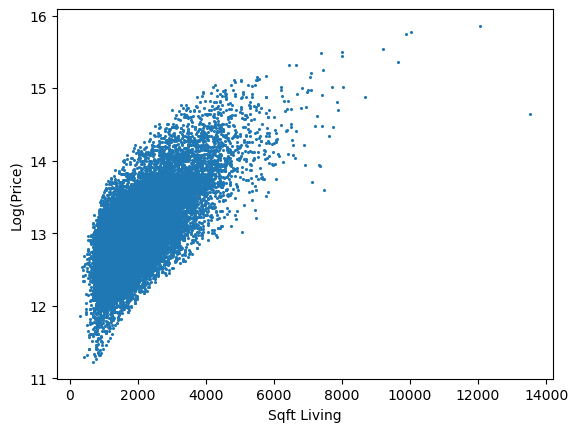

In [30]:
# Create the X matrix:
X = df.drop(["price", "date", "id"], axis=1).copy()   # important to set the copy()!

y = np.log(df['price'])  #create the y variable (log of price) 

fig, ax = plt.subplots()
ax.scatter(df.sqft_living,y,s=1.5)
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Log(Price)')

## Linear Regression

After a very easy data preparation, we are ready to do a linear regression. We will start by a univariate linear regression to see the effect of `sqft_living` onf the `log(price)`. 

In [36]:
# Create the model:
sqft_lr_model = linear_model.LinearRegression()

# Fit the model to the data:
sqft_lr_model.fit(X[["sqft_living"]], y)

# We can print the coefficients with:
print(sqft_lr_model.intercept_, sqft_lr_model.coef_)

12.21846409638085 [0.00039875]


We can plot the fitter line with seaborn `lmplot`. 

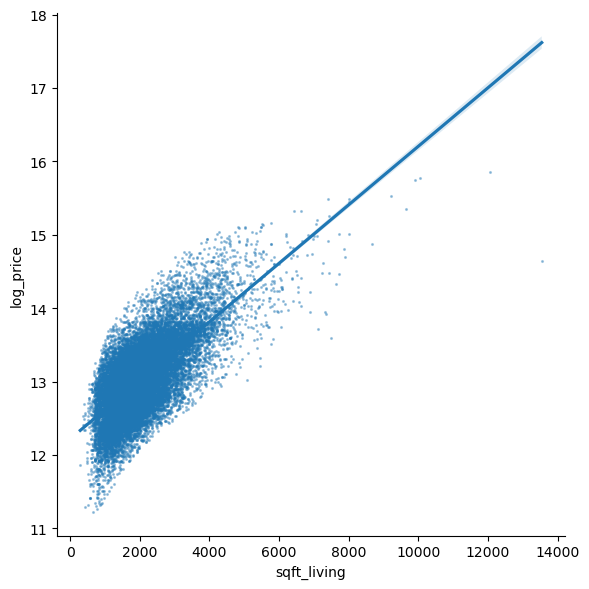

In [37]:
import seaborn as sns
df['log_price'] = y
sns.lmplot(
    data=df, x="sqft_living", y="log_price", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)

And we can also predict vaules using the `predict`option.

In [33]:
logp_5000 = sqft_lr_model.predict([[5000]])[0]   # price for sqft_living = 5000
print(logp_5000)

14.212196790106606


C:\Users\Sergi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Notice that the main problem with the regression is the poor output that it returns, since we are only able to see the coefficients of the model and no other information. For this reason, if we are interested in having a more complete outcome, we can use the package [statsmodel](https://www.statsmodels.org/stable/index.html).

## statsmodel

`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. For the linear regression case we would do it:

In [25]:
!pip install statsmodels

In [26]:
# It is imported as sm

import statsmodels.api as sm

X1  = df['sqft_living']
X1 = sm.add_constant(X1)   # include a constant(column of ones)

model = sm.OLS(y, X1)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:29:42   Log-Likelihood:                -9670.2
No. Observations:               21613   AIC:                         1.934e+04
Df Residuals:                   21611   BIC:                         1.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2185      0.006   1916.883      

## Multivariate Linear Regression

### scikit-learn
The procedure is the same as before, but now we will include mroe variables. 

In [43]:
X = df.drop(["price", "date", "id"], axis=1).copy() 
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)
print(lr_model.intercept_, lr_model.coef_)

2.2168933355715126e-12 [ 5.43531800e-16 -1.93582908e-15 -1.66412072e-15  6.14541451e-19
  2.24313502e-16 -2.48508124e-16  4.08300391e-16  5.00712888e-17
 -4.09941895e-17  1.66583810e-15  1.66399979e-15 -1.03591389e-16
 -1.70623656e-18 -1.99753811e-17 -3.11074672e-16  3.08542005e-16
 -4.25074856e-20 -1.00069976e-18  1.00000000e+00]


Again, the results are very poorly displayed. However, we can use the visualization features to plot the model fit. 

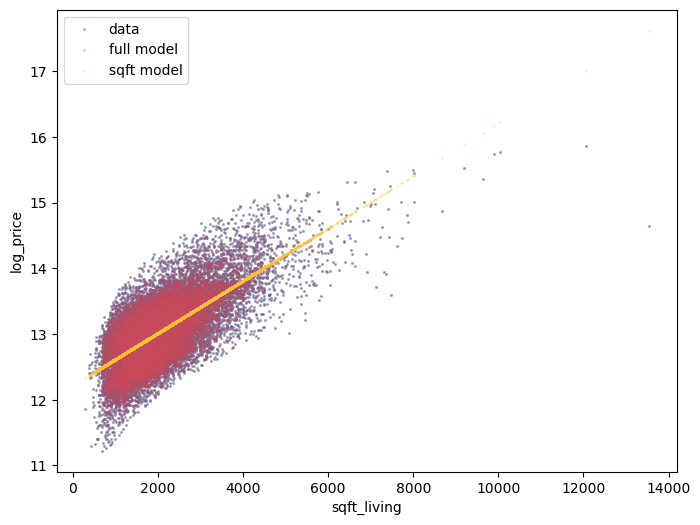

In [47]:
colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']

def var_scatter(df, ax=None, var="sqft_living"):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x=var , y="log_price", alpha=0.35, s=1.5, ax=ax)

    return ax

ax = var_scatter(df)

def scatter_model(mod, X, ax=None, color=colors[1], x="sqft_living"):
    if ax is None:
        _, ax = plt.subplots()

    ax.scatter(X[x], mod.predict(X), c=color, alpha=0.25, s=1)
    return ax

scatter_model(lr_model, X, ax, color=colors[1])
scatter_model(sqft_lr_model, X[["sqft_living"]], ax, color=colors[2])
ax.legend(["data", "full model", "sqft model"])

### statsmodels

Again, `statsmodels` provides are more intuitive and complete way of visualizing the results. 

In [48]:
X = df.drop(["price", "date", "id"], axis=1).copy() 

X = sm.add_constant(X)   # include a constant(column of ones)

model = sm.OLS(y, X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.704e+26
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:51:02   Log-Likelihood:             5.5929e+05
No. Observations:               21613   AIC:                        -1.119e+06
Df Residuals:                   21594   BIC:                        -1.118e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.547e-13   2.04e-11     -0.022

## Nonlinear Relationships in Linear Regression

It is as simple as creating a new variable.

In [49]:
X['swft2'] = X['sqft_living']**2

model = sm.OLS(y, X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.812e+23
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:21:14   Log-Likelihood:             4.9644e+05
No. Observations:               21613   AIC:                        -9.928e+05
Df Residuals:                   21593   BIC:                        -9.927e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.684e-13   3.73e-10     -0.002

## Lasso Regression

Remember lasso minimizes the sum of squared residuals with a constraint. 

$$ min_{\beta} || X\beta - y||_2^2  + \alpha || \beta ||_1 $$

We can perform a Lasso regression with `scikit-learn`.

In [50]:
lasso_model = linear_model.Lasso()
lasso_model.fit(X, y)

lasso_coefs = pd.Series(dict(zip(list(X), lasso_model.coef_)))
lr_coefs = pd.Series(dict(zip(list(X), lr_model.coef_)))
coefs = pd.DataFrame(dict(lasso=lasso_coefs, linreg=lr_coefs))
coefs

,lasso,linreg
bathrooms,0.000000e+00,-1.664121e-15
bedrooms,-0.000000e+00,-1.935829e-15
condition,0.000000e+00,-4.099419e-17
const,0.000000e+00,5.435318e-16
floors,0.000000e+00,-2.485081e-16
grade,0.000000e+00,1.665838e-15
lat,0.000000e+00,3.085420e-16
log_price,0.000000e+00,NaN
long,-0.000000e+00,-4.250749e-20
sqft_above,-0.000000e+00,1.664000e-15


As expected, Lasso is setting to 0 many coefficients. Here I include an example code to plot the path of alpha. 

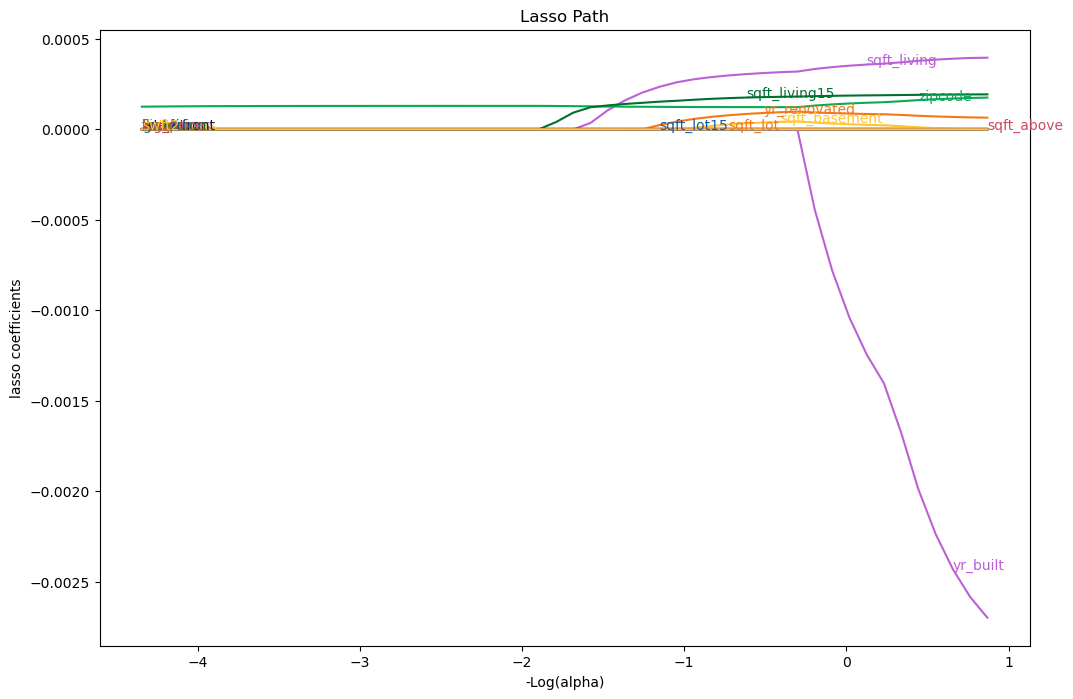

In [51]:
from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso, _ = linear_model.lasso_path(X, y, alphas=alphas, max_iter=10000)

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)

## Logistic Regressions

Logistic regressions are used to predict the probability of a particular outcome. For example, we can use them to predict the probability of a Pokemon being legendary. 

In [56]:
df = pd.read_csv('Pokemon.csv')
logmodel = linear_model.LogisticRegression()

X = df.drop(["Legendary","Name",'Type 1','Type 2','Generation'], axis=1).copy() 

logmodel.fit(X,df['Legendary'])

C:\Users\Sergi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Let's see how good are we predicting a Pokemon being legendary. To do that we just need to check the amount of times that we predict the Pokemon being legendary in comparison for wether the Pokemon is legendary or not. 

In [61]:
print((logmodel.predict(X)==df['Legendary']).sum())

761


Wow! It looks we are correctly forecasting 761 out of 800 Pokemon. 

# Clustering

Clustering is the process of clasifying data into groups. In principle, cluters are data objects that are more similar to the objects in their cluster than to the objects in the other clusters.  There are many different ways of classifying data into clusters. The process to do that are known as clustering algorithms. It is not the goal of this section to learn in detail how clustering works, but rather to show that it is a technique possible to do with Python, and easy to implement. There are different ways of classifying data into clusters:
<ul>
    <li> <b> Partitional Clustering </b>: Divides data into a prespecified amount of *k* clusters with the peculiarity that no object can be a member of more than one cluster, and every cluster must have at least one object. Furthermore, every element must have a cluster as well. </li>
    <li> <b> Hierarchical Clustering </b> : It will determine a cluster assingment by building a hierarchy. This can either be aggomerative (which merges two points that are very similar) or divisive with splits the least similar points from the cluster. </li>
    <li> <b> Density-based Clustering </b> : Determines cluster asignments based on the density of data points in a region. This approeach does not require the user to specify the number of clusters </li>
    </ul>
    
   
## K-means Clustering

K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster. They minimize the cluster by choosing the centroid, which is the center of each cluster, and the elements that belong to each cluster. 

Formally, given a set of observations $(x_1,x_2,...x_n) $ where each observation is a d-dimensional real vector, the aim is to partition the $n$ observations into $k<n$ sets $S = \{S_1,S_2,...S_k\}$ to minimize the within cluster sum of squares (the variance). The objective function is:
$$\min_{S}\sum_{i=1}^k\sum_{x\ in S_{i}} ||x-\mu_i||^2$$

To achieve this process, the algorithm is the following: 

<ol>
    <li> Specify the number of *k* clusters </li>
    <li> Randomly make a guess about the initial centroid ($\mu_i$). </li>
    <li> <b> repeat </b>: 
        <ul>
            <li> Assign each point to its closet centroid (based on a noition of distance). </li>
            <li> Compute the new centroid as the mean of the cluster </li>
        </ul>
            </li>
    <li> <b> unitl </b> The centroid position does not change. </li>
    </ol>

Let's see how can we apply the algorithm!

In [65]:
# import the packages
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

We will now simulate some data using the function `make_blobs`. We can choose an observation amount and cluster belonging. 

In [98]:
# Let's simulate some data:

data,clusters = make_blobs(n_samples = 100,  # number of observations
                  centers = 5,    # amount of clusters
                  cluster_std = 1) # st deviation

print(data[1:4],clusters[1:4])

[[-5.64528994 -7.36187723]
 [10.4216789  -6.1368026 ]
 [-4.1350853  -5.37699922]] [0 4 0]


Notice in our case we will not have any problem since we have simulated data, but if we wanted to deal with real data problems it is very important to standardize the data. This is because it is very important that all the variables have the same scale and it can have a significant impact on the performance of the algorithm.  To standardize the data we can do: 

In [99]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data[1:4],clusters[1:4])

[[-0.72656964 -0.64275161]
 [ 1.92607792 -0.26599612]
 [-0.4772357  -0.03232864]] [0 4 0]


We are now ready to create the cluster object that will perform the classification algorithm. 

In [100]:
kmeans = KMeans(
     init="random",   # how the first guess is made
     n_clusters=3,    # number of clusters
     n_init=10,       # how many times are we goig to do the initial guess
     max_iter=300,    # maximum amount of iterations
     random_state=42
 )



The parameter `n_init` is very important here. Since this algorithm can converge to many different clustering classifications depending on the initial guess, we will perform the clasification several times, and we will eventualy choose the one that has a lower within cluster sum of squares. Let's now fit the data to the model.

In [101]:
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=3, random_state=42)

Let's see the results:

In [102]:
kmeans.inertia_  # the value of the within cluster sum of squares

39.83311966436371

In [103]:
kmeans.cluster_centers_  # the centers of the clusters

array([[ 1.12805793,  0.0620889 ],
       [-0.79718408, -0.83107076],
       [-0.66174771,  1.53796372]])

In [81]:
kmeans.n_iter_ # number of iterations

7

In [104]:
kmeans.labels_[:10]   # to which cluster each element belongs

array([2, 1, 0, 1, 2, 2, 0, 1, 1, 1])

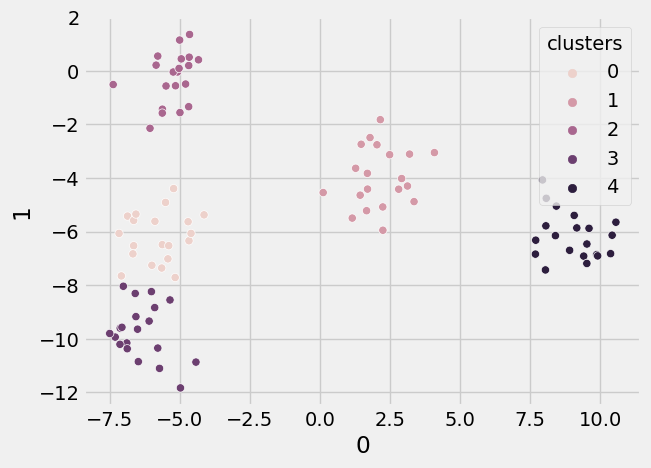

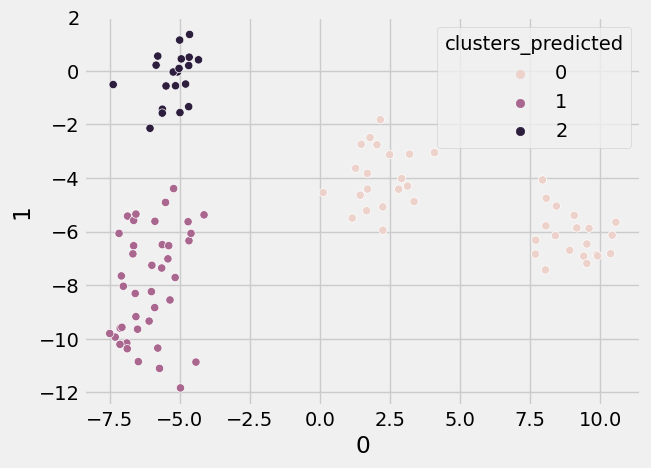

In [105]:
import seaborn as sns 
import  matplotlib.pyplot as plt

df = pd.DataFrame(data)
df['clusters'] = clusters
df['clusters_predicted']  = kmeans.labels_

fig = plt.subplots()
sns.scatterplot(x=0,y=1,data=df,hue='clusters')
plt.show()

fig = plt.subplots()
sns.scatterplot(x=0,y=1,data=df,hue='clusters_predicted')
plt.show()


But how do we determine the optimal number of clusters? 

### Elbow point

To choose the appropiate number of clusters we should focus on the marginal reduction of the sum of within cluster erros for adding a new cluster. The clusters erros (SSE) will allways be reduced by introducing a new cluster. However, for this reduction to be profitable we need to check by how much the error is actually reduced. 

Let's compute the SSE for multiple clusters. 

In [106]:
kmeans_kwargs = {
    "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

C:\Users\Sergi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


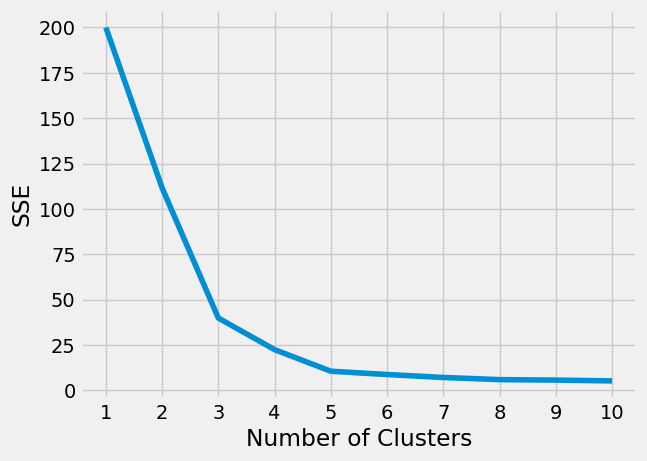

In [107]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Clearly, after the 5th cluster the reducion in the error is very small. For this reason we consider 5 to be the optimal number of clusters. 

## Clustering with many features

We have seen how to cluster with 2 features. To do it with more features, the prodecure is the same. The problem is to visualize the classification. For this, we can use the Principal Components. 

### Principal Component Analysis
Principal Component Analysis (PCA) is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets. The idea is simple, reduce the number of variables of a data set, while preserving as much information as possible.

The idea is to create new variables using linear combinations of the other variables, in orther to maximize the variance of our data (i.e. the information). To do so we will make use of eigenvectors and eigenvalues. IT happens to be the case that the eigenvectors of the Covariance matrix are actually the direction of the aces wehre there is the most variance. By ranking eigenvectors in order of their eigenvalues, we can get the principal components in order of significance.  Let's see how it works!

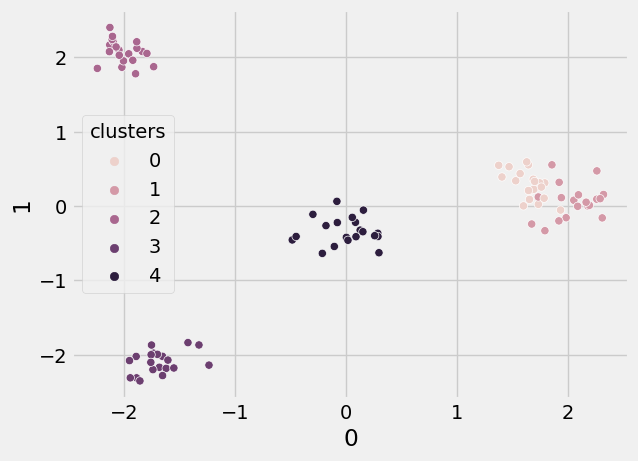

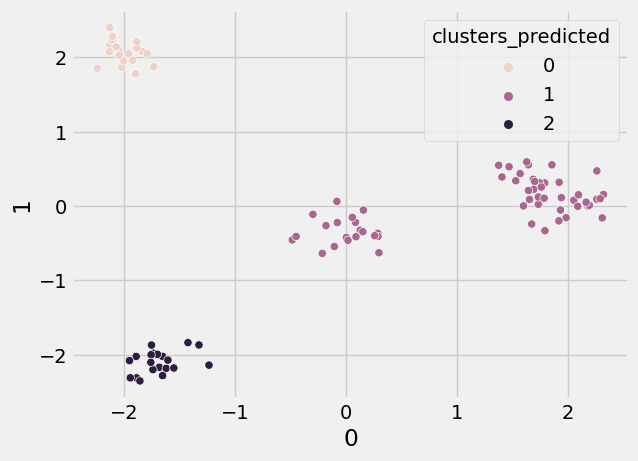

In [118]:
from sklearn.decomposition import PCA
  
# create data:
data,clusters = make_blobs(n_samples = 100,  # number of observations
                  centers = 5,    # amount of clusters
                  cluster_std = 1, # st deviation
                    n_features = 6) # number of variables
scaled_data = scaler.fit_transform(data)
kmeans = KMeans(
     init="random",   # how the first guess is made
     n_clusters=3,    # number of clusters
     n_init=10,       # how many times are we goig to do the initial guess
     max_iter=300,    # maximum amount of iterations
     random_state=42
 )

kmeans.fit(scaled_data)
pca = PCA(n_components = 2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)  # returns 2 PCA!

df = pd.DataFrame(pca_data)

df['clusters'] = clusters
df['clusters_predicted']  = kmeans.labels_

fig = plt.subplots()
sns.scatterplot(x=0,y=1,data=df,hue='clusters')
plt.show()

fig = plt.subplots()
sns.scatterplot(x=0,y=1,data=df,hue='clusters_predicted')
plt.show()



## Exercice. cluster pokemons!

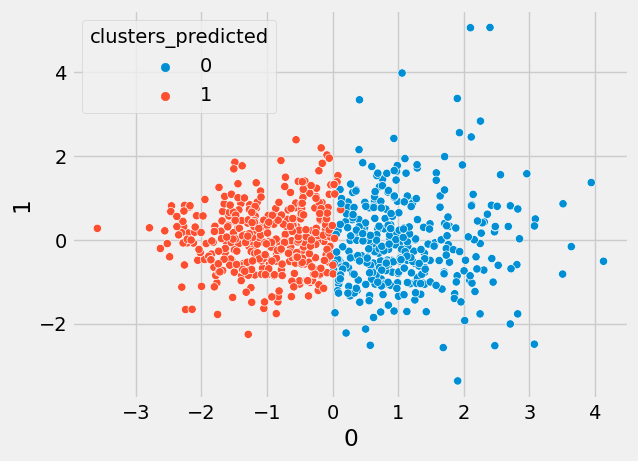

In [121]:
df = pd.read_csv('Pokemon.csv')

X = df[['Attack','HP','Speed']].copy()

kmeans = KMeans(
     init="random",   # how the first guess is made
     n_clusters=2,    # number of clusters
     n_init=10,       # how many times are we goig to do the initial guess
     max_iter=300,    # maximum amount of iterations
     random_state=42
 )

scaled_data = scaler.fit_transform(X)


kmeans.fit(scaled_data)
pca = PCA(n_components = 2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)  # returns 2 PCA!

df = pd.DataFrame(pca_data)

df['clusters_predicted']  = kmeans.labels_


fig = plt.subplots()
sns.scatterplot(x=0,y=1,data=df,hue='clusters_predicted')
plt.show()

## Exercice 2, see how this realtes to legendary types!

# Neural Networks

We will now see how to estimate a neural network with the library `scikit-learn`. Remember that in this course we will not really learn what neural netowkrs are. The purpose of this is just to expose the class to topic so that in case you are interested you know where to start. 

The most basic neuronal network is the multi-layer perceptron (MLP). These netowkrs are composed of node layers, containing an input layer, one or more hidden layer and an output layer. Each node connects to another and has an associated weight and threshold. If the output of any individual node is above a specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.  Let's see how they look:

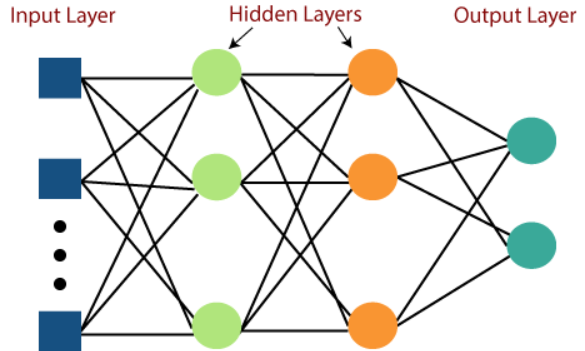

One should think as each individual node as its own linear regression model. Formally, they look like this: 
$$ y = f_1(Xw_1+b_1)w_2+b_2$$
And what we have are nested linear regressions, separated by an activation function $f_1$. The components are: 
<ul> 
    <li> $X$ : It is the input data. </li>
    <li> $w_1$ : It is a matrix of weights for each vairable and node </li>
    <li> $b_1$: It is a vector of coefficients known as the bias. </li>
    <li> $f_1$ is a non-linear function known as the activation function </li>
    </ul>
    
The idea is the following, if the activation function produces a value above the bias, the next node will be activated. Otherwise, it won't. 

A two layer network would look like:
$$y = f_2(f_1(Xw_1+b_1)w_2+b_2)w_3+b_3 $$

As with the linear regression model, to obtain the values for the coefficients we use test data to minimize a loss function. Usually we use the mean squared error $$||y-\hat{y}||_ 2^2$$ where $\hat{y}$ is the neuronal network prediction.

### Creating our neural network

Let's see how the neural network works with housing prices. 

<AxesSubplot:xlabel='sqft_living', ylabel='log_price'>

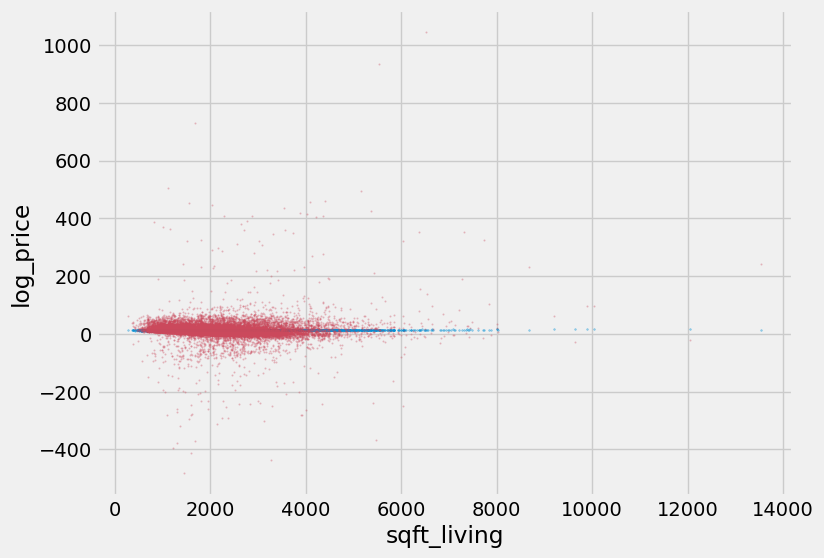

In [127]:
from sklearn import neural_network
url = "https://datascience.quantecon.org/assets/data/kc_house_data.csv"
df = pd.read_csv(url)
df['log_price'] = np.log(df['price'])
X = df.drop(["price", "date", "id", "log_price"], axis=1).copy()
for col in list(X):
    X[col] = X[col].astype(float)
y = np.log(df["price"])

# two hidden layers, with N1=30 and N2=20
nn_model = neural_network.MLPRegressor((30, 20))
nn_model.fit(X, y)   # fit the data to the model.

ax = var_scatter(df)
scatter_model(nn_model, X, ax=ax)

It looks the model is very poorly forecasting log_price. Let's see how the MSE looks like:

In [128]:
mse_nn = metrics.mean_squared_error(y, nn_model.predict(X))
mse_nn / metrics.mean_squared_error(y, lr_model.predict(X))

C:\Users\Sergi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- log_price

  warnings.warn(message, FutureWarning)


ValueError: X has 18 features, but LinearRegression is expecting 19 features as input.

It is clearly much bigger than the one in the linear regression case. 

### Input Scaling

The problem with the neural networks is that they are very sensitive to the scale of the input features. A common technique to overcome this issue is to standardize all the variables. 

It is important to notice that if we decide to standardize our variables, we must remember to apply the same transformation at predicition time as we did when we fit the model. 

So we must do three things: 
<ul>
    <li> Store the mean and standard deviation of each feature in the training set </li>
    <li> Substract each feature's mean from the training data and then divide by the feature's standard deviation before fitting </li>
    <li> Substract the training data's mean and divide by the standard deviation for all prediction inputs </li>
    </ul>
    
To avoid forgetting any step, we can create a pipline that will make sure everything is done. 

In [129]:
from sklearn import preprocessing, pipeline

# the pipeline defines any number of steps that will be applied
# to transform the `X` data and then a final step that is a model
# we can use for prediction
nn_scaled_model = pipeline.make_pipeline(
    preprocessing.StandardScaler(),  # this will do the input scaling
    neural_network.MLPRegressor((30, 20))  # put your favorite model here
)

# We can now use `model` like we have used our other models all along
# Call fit
nn_scaled_model.fit(X, y)

# Call predict
mse_nn_scaled = metrics.mean_squared_error(y, nn_scaled_model.predict(X))

print(f"Unscaled mse {mse_nn}")
print(f"Scaled mse {mse_nn_scaled}")

Unscaled mse 928.7856895509315
Scaled mse 0.031272511049909364


It looks the performance of our model has been improved. Let's see it graphically:

<AxesSubplot:xlabel='sqft_living', ylabel='log_price'>

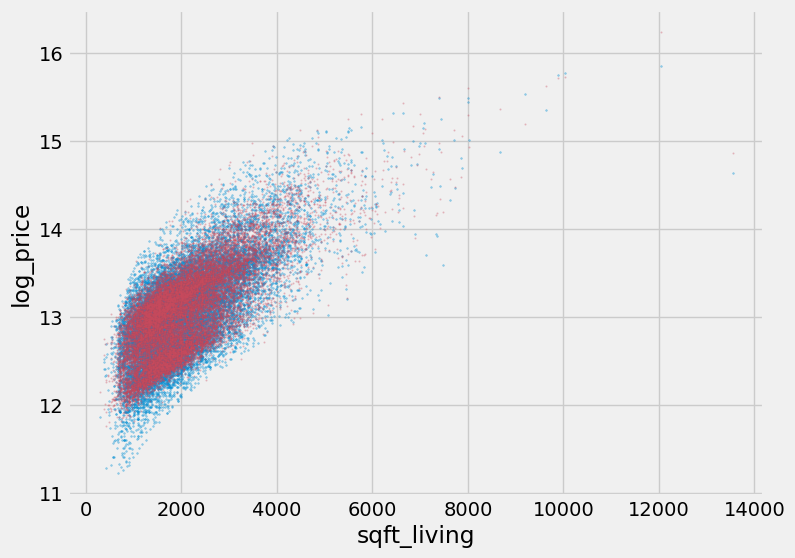

In [130]:
ax = var_scatter(df)
scatter_model(nn_scaled_model, X, ax=ax)

## Exercice! Create a Neural Network to clasify Pokemons in legendary vs not legendary. Use a random sample to train, and test it with not trained data. 

## You can also work with the data set of your own choice!